# A Standard PyTorch Workflow

1. Get data ready (turn into tensors)
2. Build or pick a pretrained model (to suit your problem)
  
  ------2.1 Pick a loss function & optimizer

  ------2.2 Build a training loop

3. Fit the model to the data and make a prediction

4. Evaluate the model

5. Improve through experimentation

6. Save and reload your trained model

We're going to get `torch`, `torch.nn` (nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu124'

1. Data (preparing and loading)

"Data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.

Machine learning is a game of two parts:

1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the representation as best as possible.

Sometimes one and two can be done at the same time.

But what if you don't have data? Well, that's where we're at now.

No data. But we can create some. Let's create our data as a straight line.

We'll use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Now we move towards building a model that can learn the relationship between `X` (features) and `y` (labels).

Split data into training and test sets

We've got some data. But before we build a model we need to split it up.

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:

**Training set**:
The model learns from this data(like the course materials you study during the semester).

~60-80% of total data

Always used

**Validation set**:
The model gets tuned on this data (like the practice exam you take before the final exam).

~10-20% of total data

Often but not always used

**Testing set**:
The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).

~10-20% of total data

Always used


In [3]:
#For this start, we'll use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.
#We can create them by splitting our X and y tensors.

**Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn from training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [4]:
# Create train/test split to get 40 samples for training (X_train & y_train) and 10 samples for testing (X_test & y_test).
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
#create a function to visualize it
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

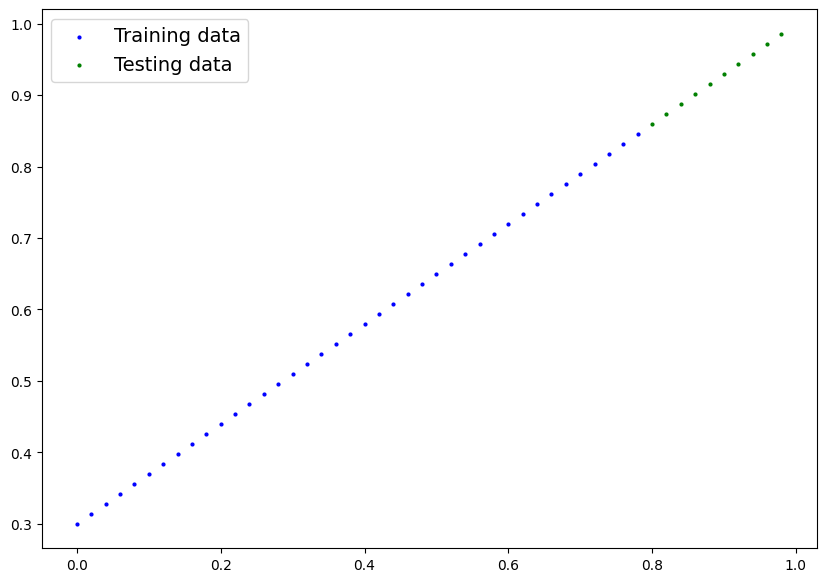

In [6]:
plot_predictions();

#2. Build model
Build a model to use the blue dots to predict the green dots.

Replicate a standard linear regression model using pure PyTorch.

Ues Python classes to create bits and pieces for building neural networks.

Refresh on OOP: [Real Python's Object Orientating programming in Python 3 guide](https://realpython.com/python3-object-oriented-programming/)

In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

#PyTorch model building essentials

PyTorch has 4 (give or take) essential modules you can use to create almost any kind of neural network you can imagine:

#1. [ torch.nn](https://pytorch.org/docs/stable/nn.html),

Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

#2. [ torch.optim](https://pytorch.org/docs/stable/optim.html),

Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss).


#3. [ torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset),


#4. [ torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html).


#[torch.nn.Parameter](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter)

Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [gradient descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)) are calculated automatically, this is often referred to as "autograd".


#[torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)

The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented.

#def forward()

All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above).



###Almost everything in a PyTorch neural network comes from torch.nn:

* `nn.Module` contains the larger building blocks (layers)

* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))

* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within `nn.Module`(s)

* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

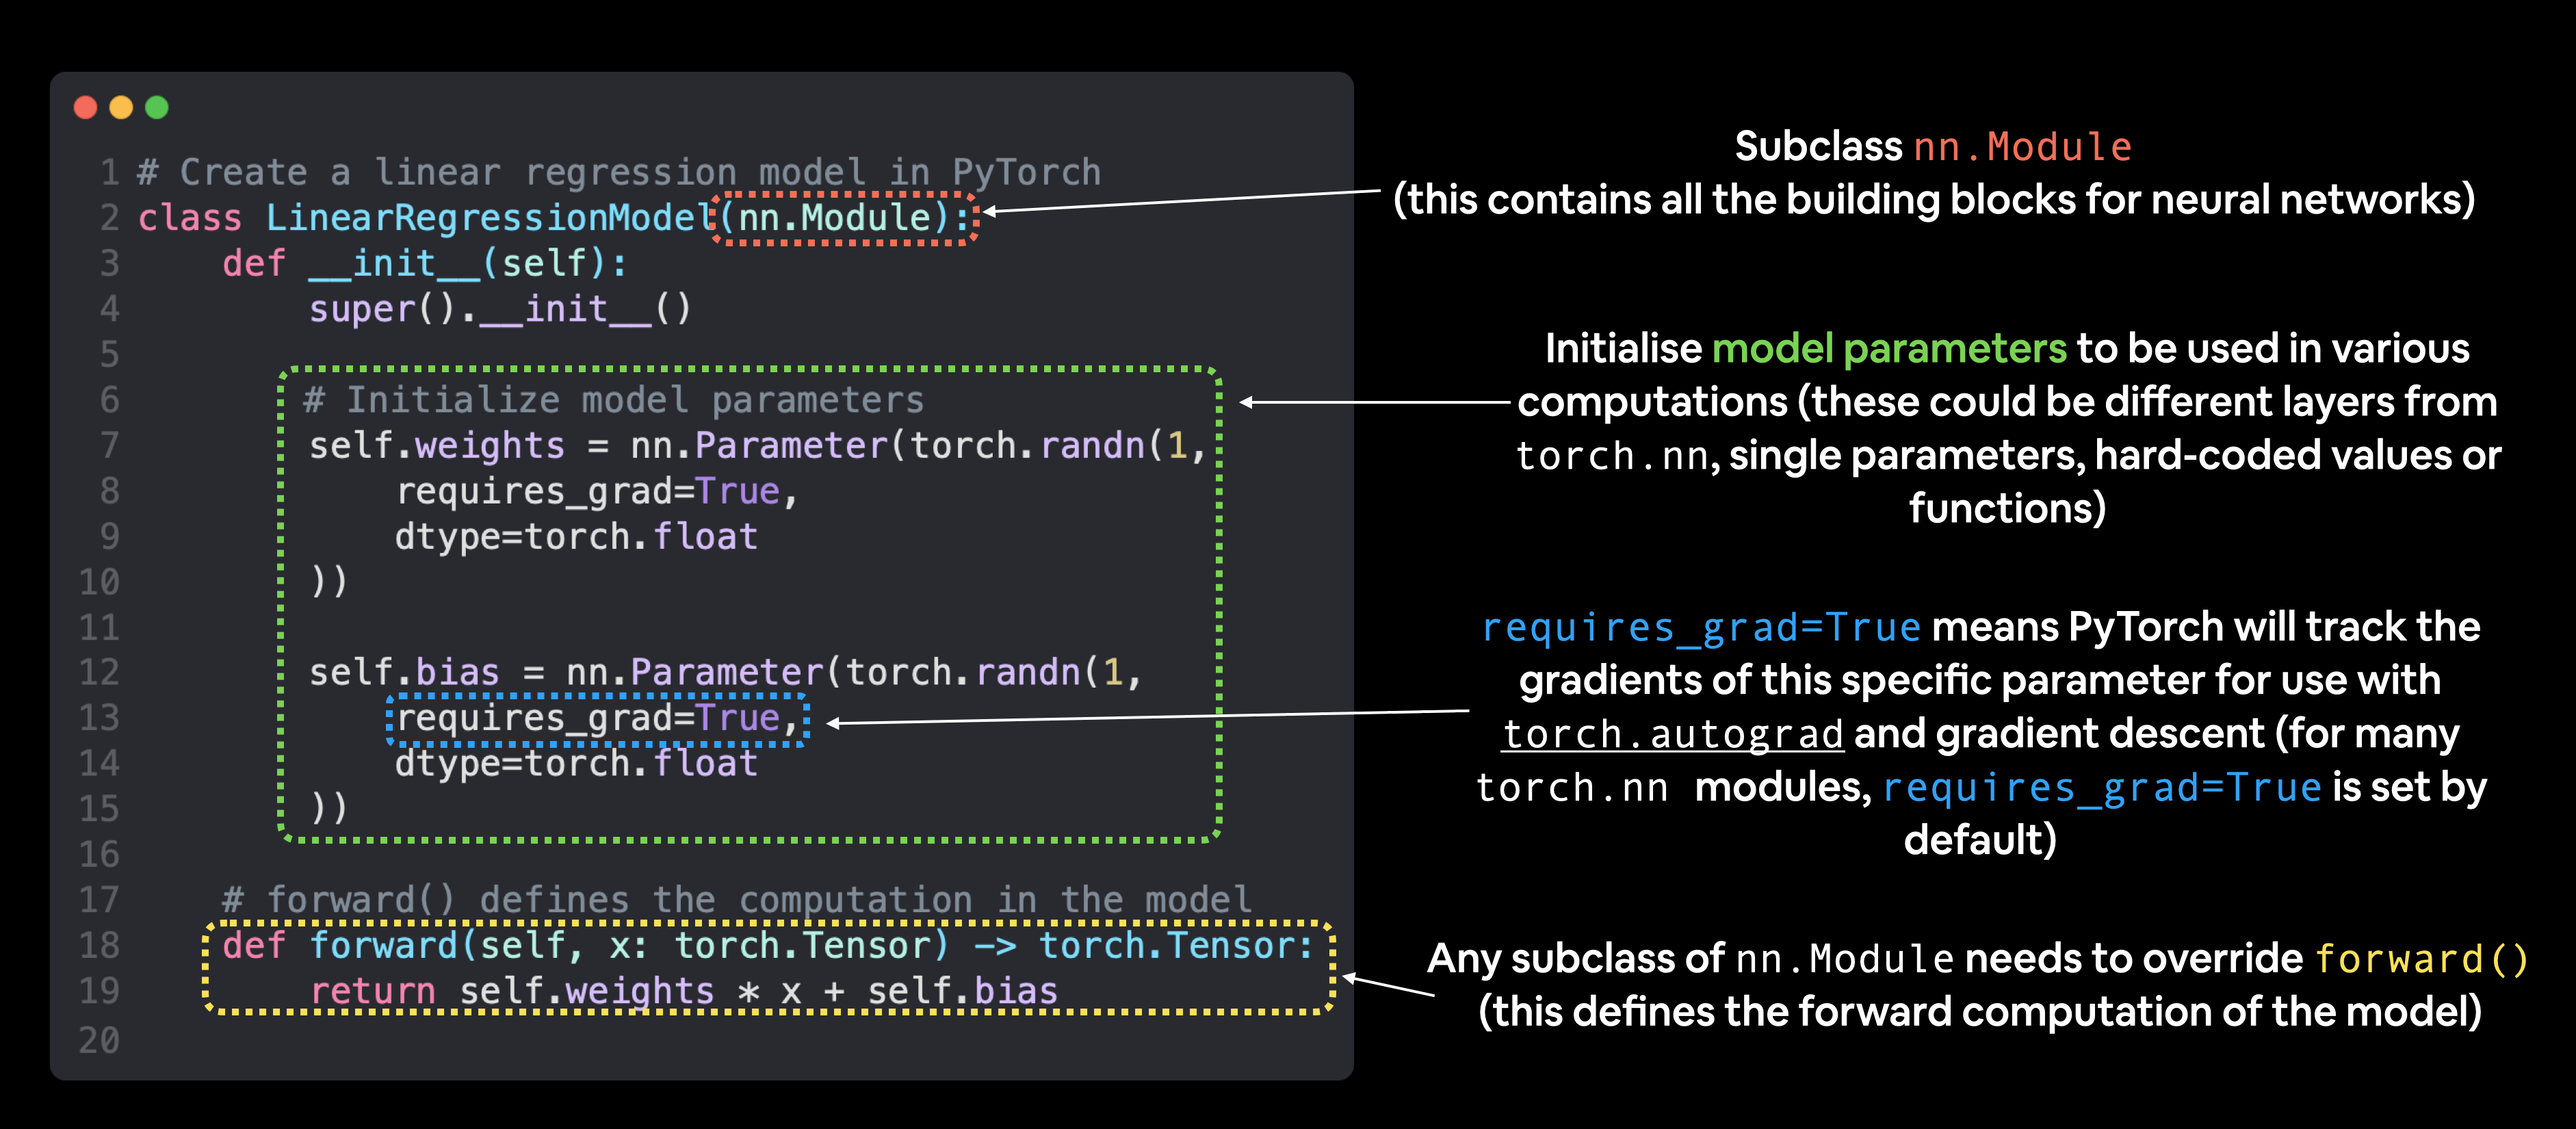

Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.

More of these essential modules and their use cases are in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

#Checking the contents of a PyTorch model
Create a model instance with the class we've made and check its parameters using `.parameters()`.

In [8]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]


We can also get the state (what the model contains) of the model using
[`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict)

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Since we initialized the values for `weights` and `bias` from `model_0.state_dict()` above using `torch.randn()`, they come out as random float tensors.

Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the hardcoded `weight` and `bias` values we set when creating our straight line data).

Because our model starts with random values, right now it'll have poor predictive power.

#Making predictions using torch.inference_mode()

To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

Now make some predictions.

In [10]:
# Make predictions with model
with torch.inference_mode(): #context manager
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

You probably noticed we used torch.inference_mode() as a [context manager ](https://realpython.com/python-with-statement/)(that's what the `with torch.inference_mode(): is`) to make the predictions.

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make **forward-passes** (data going through the forward() method) faster.

Note: In older PyTorch code, you may also see `torch.no_grad()` being used for inference. While `torch.inference_mode()` and `torch.no_grad()` do similar things, `torch.inference_mode()` is newer, potentially faster and preferred. See this [Tweet](https://x.com/PyTorch/status/1437838231505096708?s=20) from PyTorch for more.

In [11]:
# Visualize the predictions
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


Notice how there's one prediction value per testing sample. This is because of the kind of data we're using. For our straight line, one X value maps to one y value.

However, machine learning models are very flexible. You could have 100 X values mapping to one, two, three or 10 y values. It all depends on what you're working on.

Now let's visualize them with `plot_predictions()` function we created above.

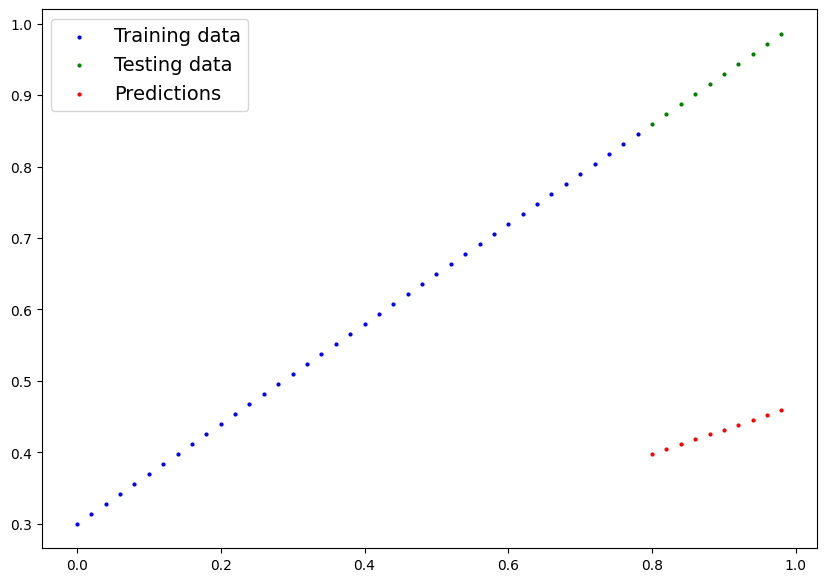

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

Woah! These predictions look pretty bad...This makes sense though, this model is just using random parameter values to make predictions. It hasn't even looked at the blue dots to try to predict the green dots.

Now let's change that by training our model.

#3. Train model
Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (patterns), the `weights` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

We could hard code this (since we know the default values weight=0.7 and bias=0.3) but where's the fun in that? Much of the time we won't know what the ideal parameters are for a model. Instead, we will write code to see if the model can try and figure them out itself.

#Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe: **loss function** as well as an **optimizer**.

The roles of these are:

##**Loss function:**

Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. PyTorch has plenty of built-in loss functions in `torch.nn`.

**Mean absolute error (MAE)** for regression problems (`torch.nn.L1Loss()`). **Binary cross entropy** for binary classification problems (`torch.nn.BCELoss()`).

##**Optimizer:**

Tells your model how to update its internal parameters to best lower the loss. You can find various optimization function implementations in `torch.optim`.

**Stochastic gradient descent** (`torch.optim.SGD()`). **Adam optimizer** (`torch.optim.Adam()`).

Let's create a loss function and an optimizer we can use to help improve our model. Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the **SGD (stochastic gradient descent)** or **Adam optimizer**. And the **MAE (mean absolute error) loss function** for regression problems (predicting a number) or **binary cross entropy loss function** for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss()`) in PyTorch as our loss function.

**Mean absolute error** (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

And we'll use **SGD(stochastic gradient descent)**, `torch.optim.SGD(params, lr)` where:

* **params** is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).

* **lr** is the **learning rate** you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values).

The learning rate is considered a **hyperparameter** (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called **learning rate scheduling**).


In [14]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is the same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

#Creating an optimization loop in PyTorch
Now we've got a loss function and an optimizer, it's now time to create a training loop (and testing loop).

The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

#PyTorch training loop

1. Forward pass:

  The model goes through all of the training data once, performing its `forward()` function calculations. `model(x_train)`

2. Calculate the loss

   The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. `loss = loss_fn(y_pred, y_train)`

3. Zero gradients

   The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. `optimizer.zero_grad()`

4. Perform backpropagation on the loss

   Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as **backpropagation**, hence "backwards". `loss.backward()`

5. Update the optimizer (**gradient descent**)


  Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. `optimizer.step()`





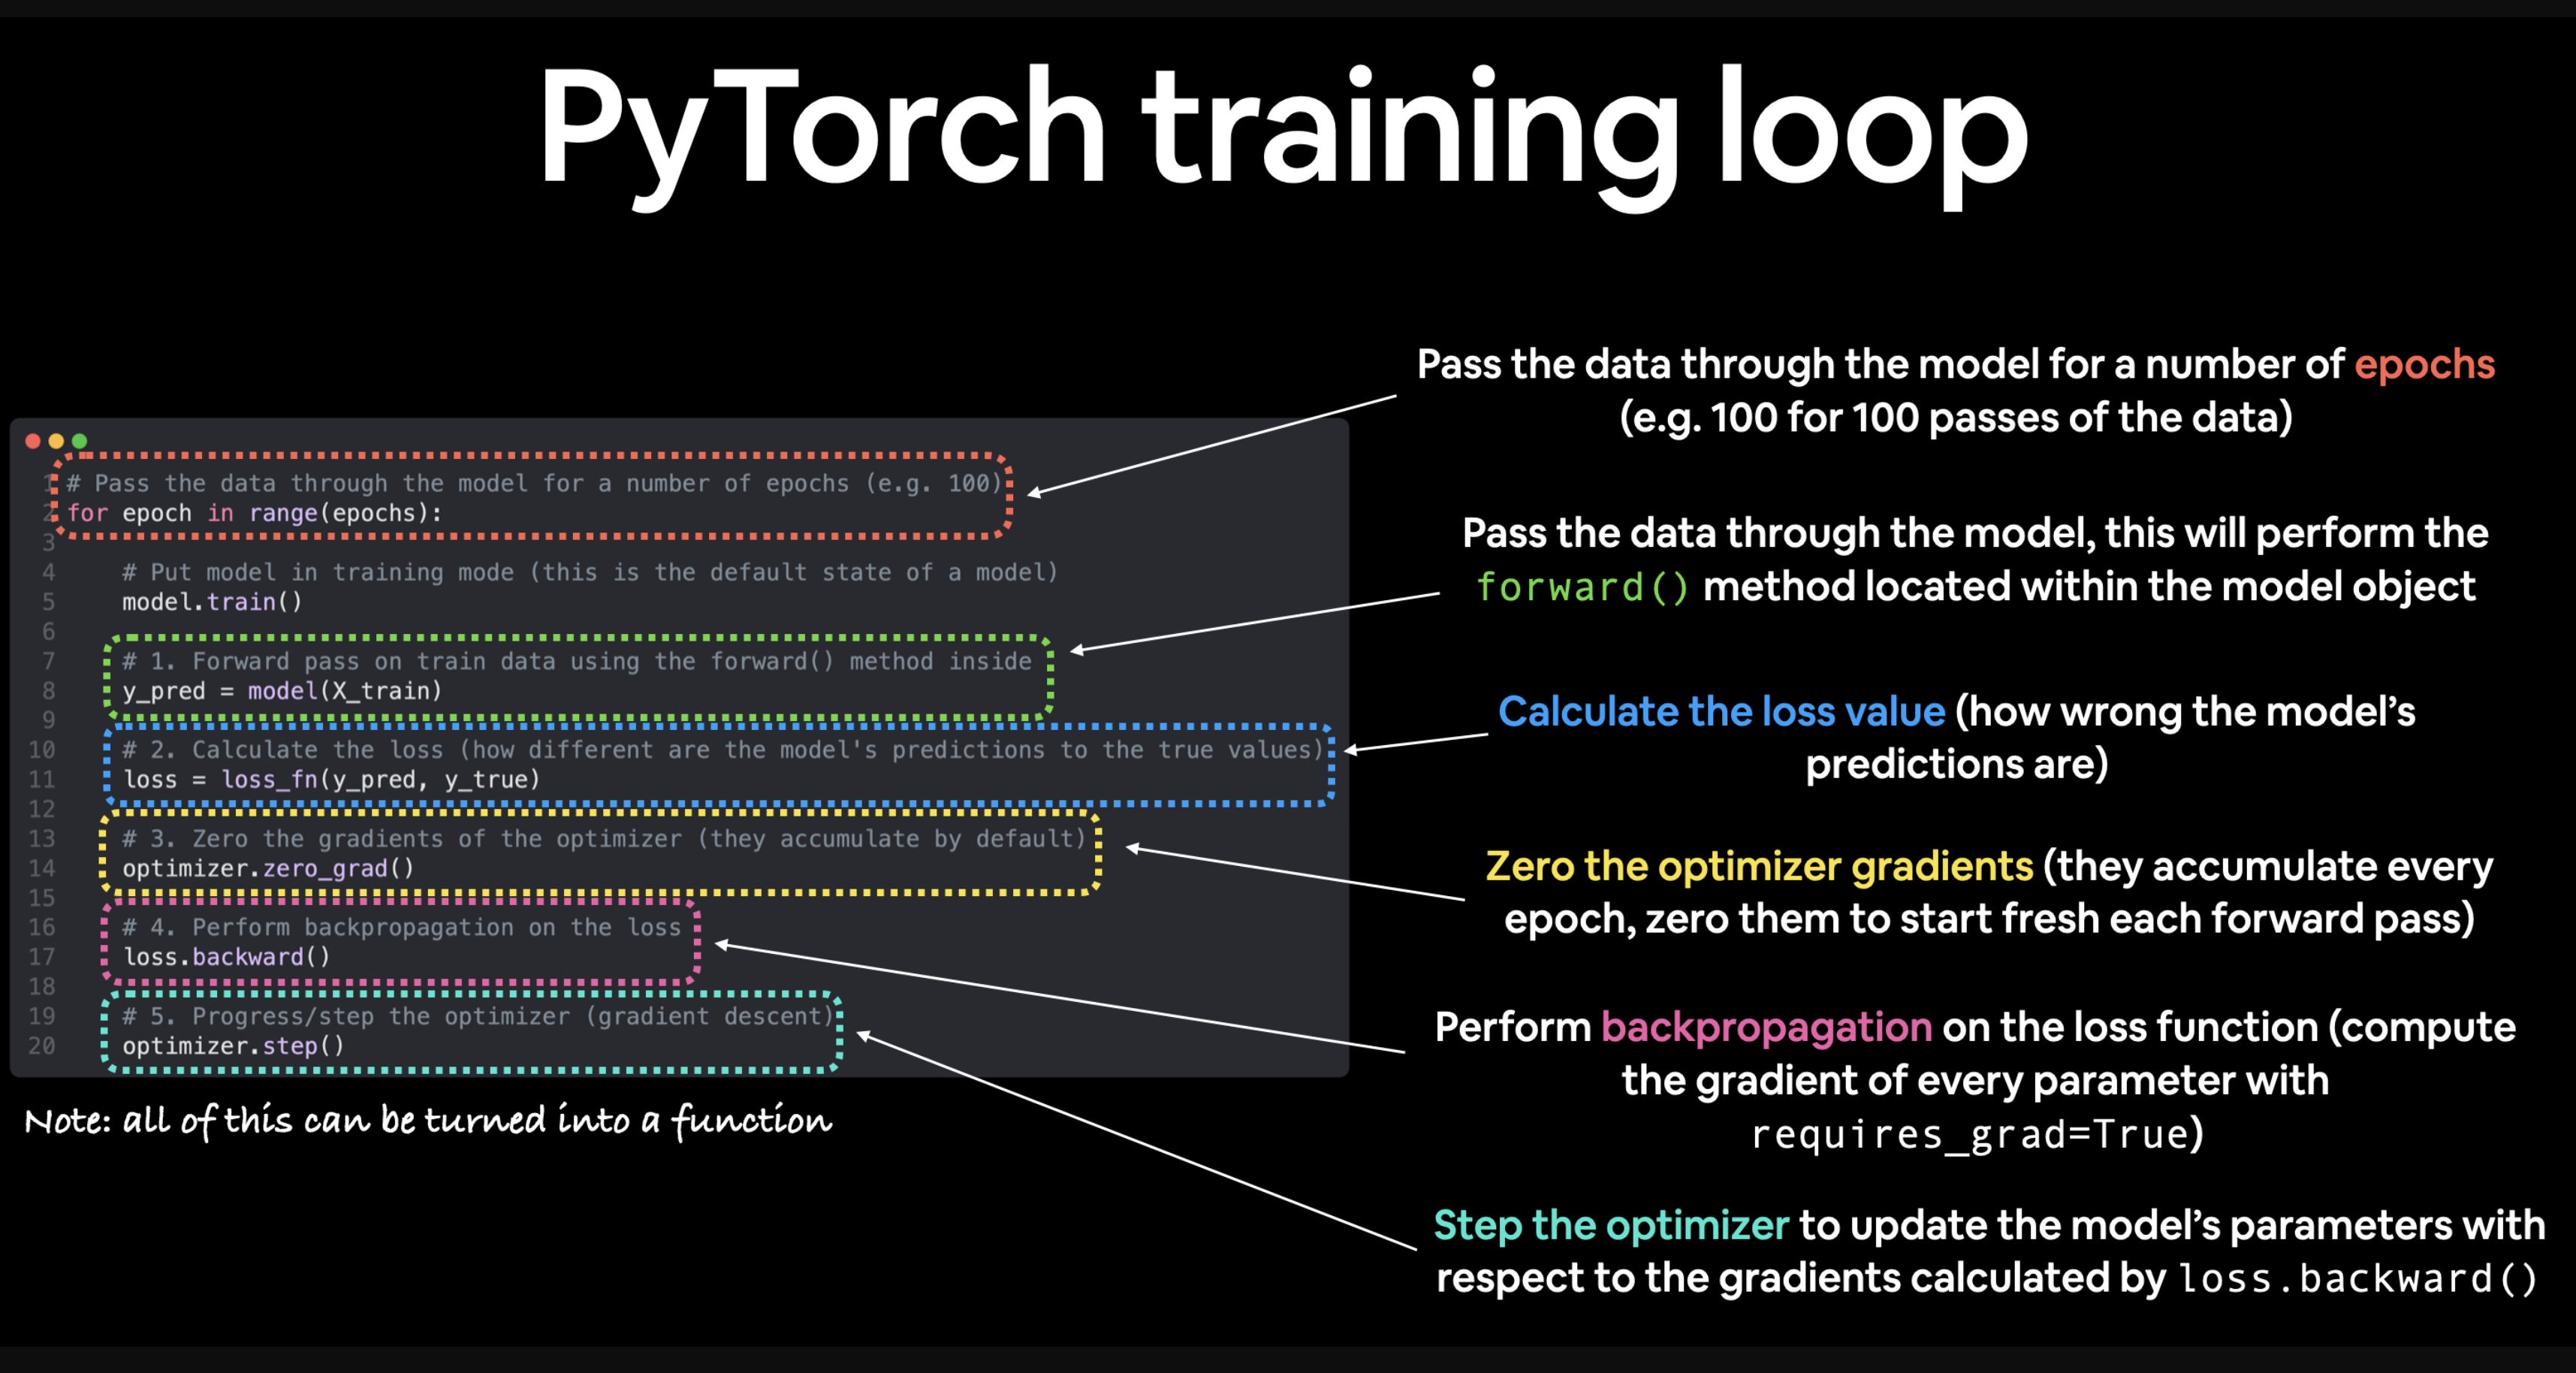

On the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:

*   Calculate the loss (`loss = ...`) before performing backpropagation on it (`loss.backward()`).
*   Zero gradients (`optimizer.zero_grad()`) before computing the gradients of the loss with respect to every model parameter (`loss.backward()`).
*   Step the optimizer (`optimizer.step()`) after performing backpropagation on the loss (`loss.backward()`).

#PyTorch testing loop¶

As for the testing loop (evaluating our model), the typical steps include:

1. Forward pass

   The model goes through all of the testing data once, performing its `forward()` function calculations. `model(x_test)`

2. Calculate the loss

   The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. `loss = loss_fn(y_pred, y_test)`

3. Calulate evaluation metrics (optional)

   Alongside the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. Custom functions




Notice the testing loop doesn't contain performing backpropagation (`loss.backward()`) or stepping the optimizer (`optimizer.step()`), this is because no parameters in the model are being changed during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.
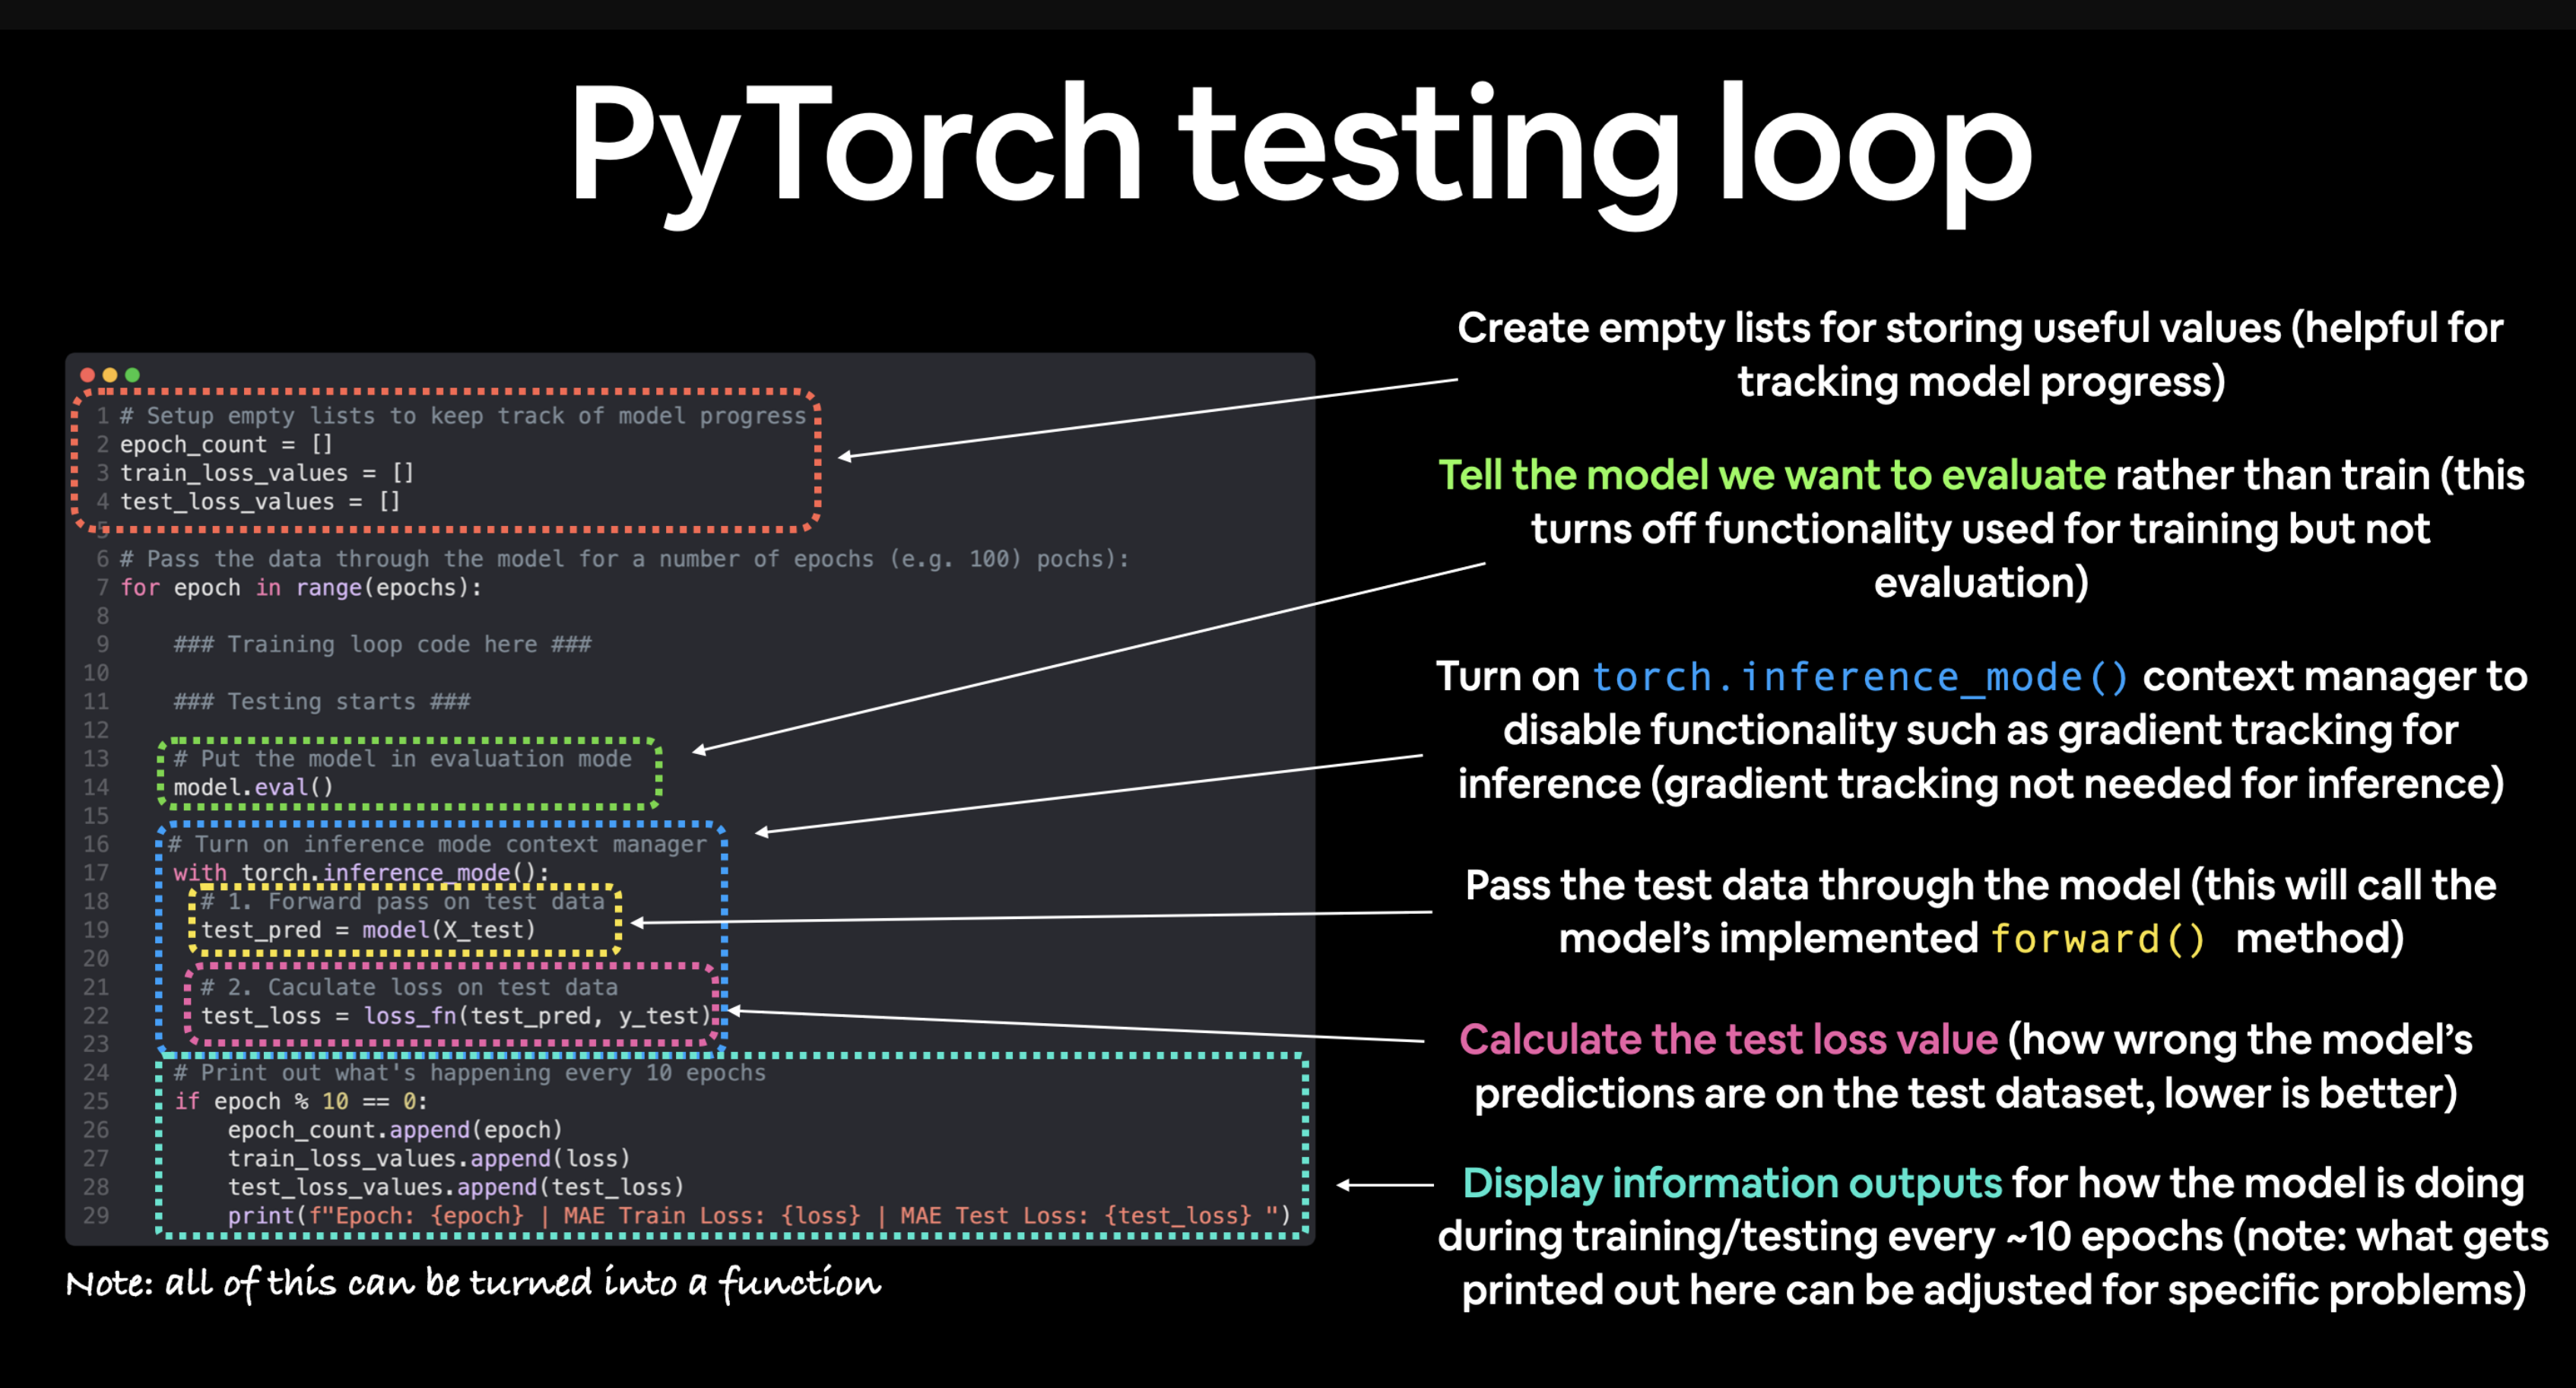

Let's put all of the above together and train our model for 100 **epochs** (forward passes through the data) and we'll evaluate it every 10 epochs.

In [15]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


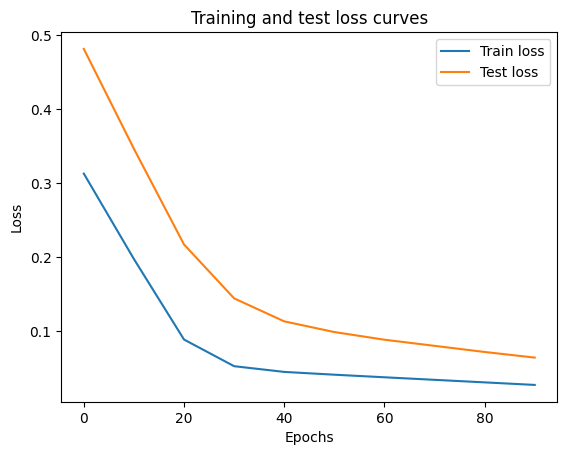

In [16]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

The loss curves show the loss going down over time. Remember, loss is the measure of how wrong your model is, so the lower the better.

But why did the loss go down?

Well, thanks to our loss function and optimizer, the model's internal parameters (`weights` and `bias`) were updated to better reflect the underlying patterns in the data.

Let's inspect our model's `.state_dict()` to see how close our model gets to the original values we set for weights and bias.

In [17]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")


The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Our model got very close to calculating the exact original values for `weight` and `bias` (and it would probably get even closer if we trained it for longer).

This is the whole idea of machine learning and deep learning, **there are some ideal values that describe our data** and rather than figuring them out by hand, **we can train a model to figure them out programmatically.**

# 4. Making predictions with a trained PyTorch model (inference)

Once you've trained a model, you'll likely want to make predictions with it.We've already seen a glimpse of this in the training and testing code above, the steps to do it outside of the training/testing loop are similar.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

1. Set the model in evaluation mode (`model.eval()`).

2. Make the predictions using the inference mode context manager (`with torch.inference_mode(): ...`).

3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

The first two items make sure all helpful calculations and settings PyTorch uses behind the scenes during training but aren't necessary for inference are turned off (this results in faster computation). And the third ensures that you won't run into cross-device errors.

In [18]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

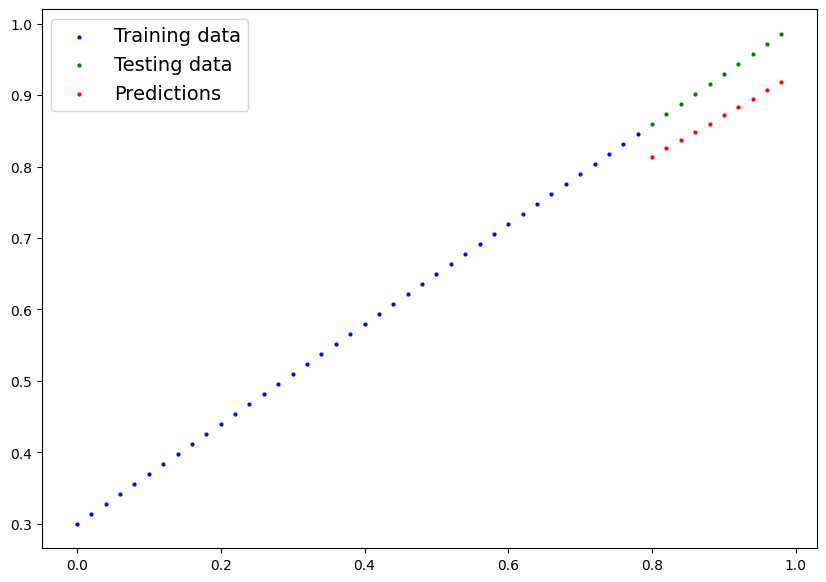

In [19]:
plot_predictions(predictions=y_preds)

Those red dots are looking far closer than they were before!

#5. Saving and loading a PyTorch model

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

`torch.save`:

Saves a serialized object to disk using Python's [pickle](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`.

`torch.load`:

Uses [pickle](https://docs.python.org/3/library/pickle.html)'s unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).

`torch.nn.Module.load_state_dict`:

Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object.

Note: the pickle module is not secure. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.

#Saving a PyTorch model's `state_dict()`

[The recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

1. We'll create a directory for saving models to called `models` using Python's `pathlib` module.

2. We'll create a file path to save the model to.

3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

Note: It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`.

In [20]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [21]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Feb 27 03:16 models/01_pytorch_workflow_model_0.pth


#Loading a saved PyTorch model's `state_dict()`

Since we've now got a saved model `state_dict()` at `models/01_pytorch_workflow_model_0.pth` we can now load it in using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`.

Why call `torch.load()` inside `torch.nn.Module.load_state_dict()`?

Because we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the entire model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of `nn.Module`).

Why not save the entire model?

[Saving the entire model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more intuitive, however: `the disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved..Because of this, your code can break in various ways when used in other projects or after refactors.`

So instead, we're using the flexible method of saving and loading just the `state_dict()`, which again is basically a dictionary of model parameters.

Let's create another instance of `LinearRegressionModel()`, which is a subclass of `torch.nn.Module` and will hence have the in-built method `load_state_dict()`.

In [22]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-22-c3119fcaa06c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

Now let's test our loaded model, let's perform inference with it (make predictions) on the test data.

PyTorch inference rules:

1. Set the model in evaluation mode (model.eval()).

2. Make the predictions using the inference mode context manager (`with torch.inference_mode(): ...`).

3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).



In [23]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [24]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

There are more methods to save and load PyTorch models. See the [PyTorch guide for saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models) for more.